In [1]:
!pip install kaggle

In [2]:
!ls ~/.kaggle

ls: cannot access '/root/.kaggle': No such file or directory


In [3]:
from google.colab import files
files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"marcelasuarez01","key":"6335671427573f83775e72782d382379"}'}

In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"

!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

In [7]:
!unzip udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [31]:
import pandas as pd
import numpy as np

datos = pd.read_csv("/content/train.csv")
datos.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [32]:
print(datos.columns.tolist())

['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'coef_1', 'coef_2', 'coef_3', 'coef_4']


In [33]:
datos = datos[['ESTU_HORASSEMANATRABAJA', 'RENDIMIENTO_GLOBAL', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'FAMI_ESTRATOVIVIENDA']]
datos.head()

,ESTU_HORASSEMANATRABAJA,RENDIMIENTO_GLOBAL,ESTU_VALORMATRICULAUNIVERSIDAD,FAMI_ESTRATOVIVIENDA
0,Menos de 10 horas,medio-alto,Entre 5.5 millones y menos de 7 millones,Estrato 3
1,0,bajo,Entre 2.5 millones y menos de 4 millones,Estrato 3
2,Más de 30 horas,bajo,Entre 2.5 millones y menos de 4 millones,Estrato 3
3,0,alto,Entre 4 millones y menos de 5.5 millones,Estrato 4
4,Entre 21 y 30 horas,medio-bajo,Entre 2.5 millones y menos de 4 millones,Estrato 3


In [34]:
!pip install rlxutils

  Preparing metadata (setup.py) ... done
  Created wheel for rlxutils: filename=rlxutils-0.1.10-py3-none-any.whl size=11100 sha256=f80ab3dd2f8187a0c01e1872f03c7cb5cfa4ef97917b4363ec89932f24b67abe
  Stored in directory: /root/.cache/pip/wheels/1d/99/c0/f49a3db4e38f121da6a422c352a7ff70baf2cc21c25b851a6c
Successfully built rlxutils


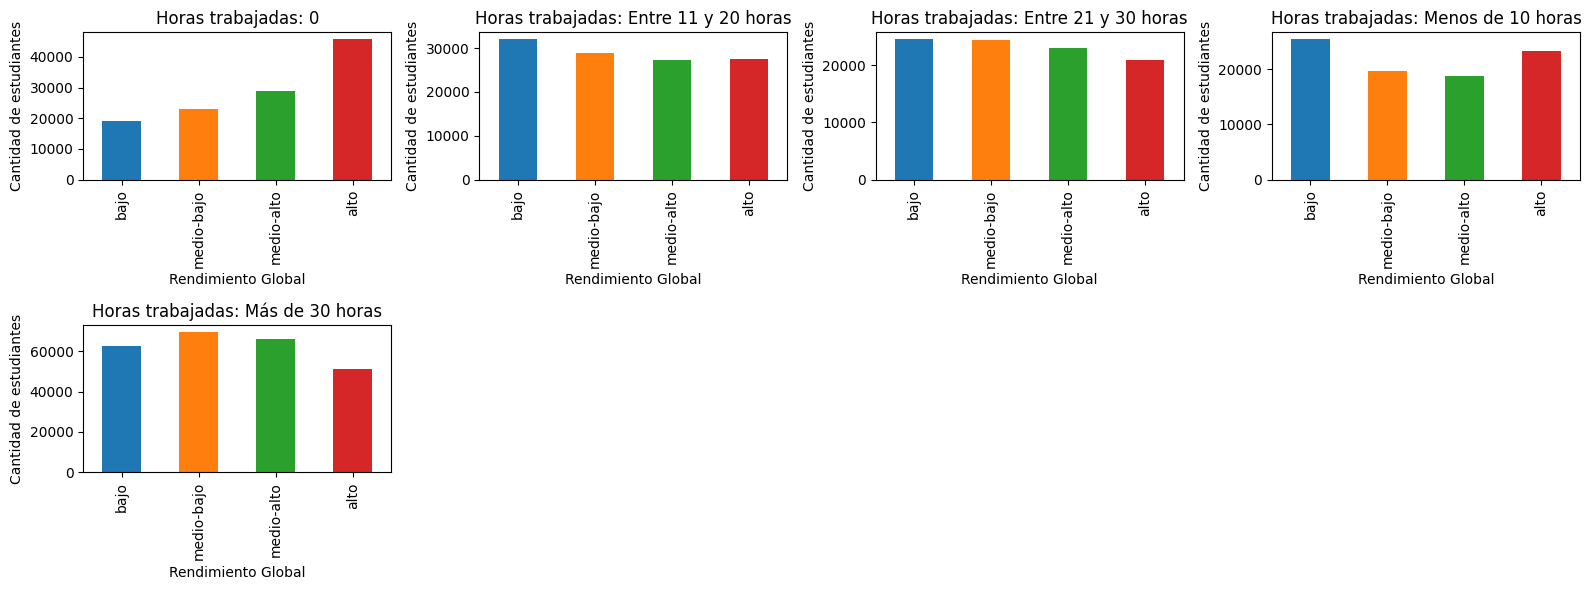

In [35]:
from rlxutils import subplots
import matplotlib.pyplot as plt

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
hora_trabajo= sorted(datos.ESTU_HORASSEMANATRABAJA.value_counts().index)
for ax,ci in subplots(hora_trabajo, n_cols=4, usizex=4):
    zc = datos[datos.ESTU_HORASSEMANATRABAJA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar',color=colors)
    plt.title(f'Horas trabajadas: {ci}')
    plt.xlabel('Rendimiento Global')
    plt.ylabel('Cantidad de estudiantes')

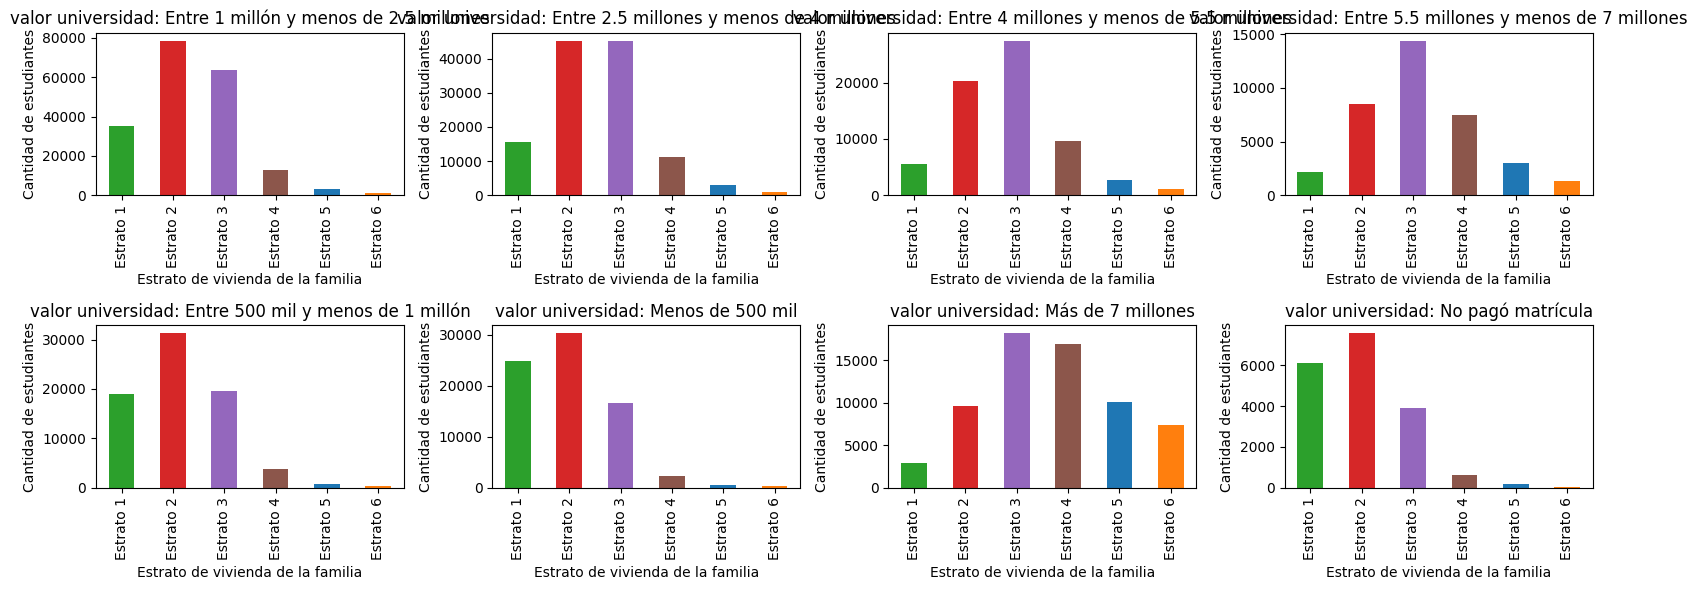

In [37]:
colores = ['#2ca02c', '#d62728', '#9467bd', '#8c564b', '#1f77b4', '#ff7f0e']
estrato_internet = sorted(datos.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().index)
for ax,ci in subplots(estrato_internet, n_cols=4, usizex=4):
    zc = datos[datos.ESTU_VALORMATRICULAUNIVERSIDAD==ci]
    zc.FAMI_ESTRATOVIVIENDA.value_counts()[['Estrato 1', 'Estrato 2','Estrato 3','Estrato 4','Estrato 5','Estrato 6']].plot(kind='bar', color=colores)
    plt.title(f'valor universidad: {ci}')
    plt.xlabel('Estrato de vivienda de la familia')
    plt.ylabel('Cantidad de estudiantes')